<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/inferencias-estadisticas/5.%20Realizar%20inferencias%20estadisticas%20a%20partir%20de%20una%20muestra/15_Errores_estad%C3%ADsticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Errores estadísticos Tipo 1 y Tipo 2

Al hacer analisis estadístico existe un grado de error que debemos medir y cuantificar. Para ello veamos diferentes alternativas a la hora de realizar inferencias estadisticas sobre una variable aleatoria.

![errores_estadisticos](https://imgur.com/JcMO7Lq.png)

![descripcion_del_error](https://imgur.com/fnyG2Xt.png)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Vamos a trabajar sobre los datos del caso utilizado en Prueba de hipotesis.
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56,
           47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 
           32, 37, 32, 34, 48, 20, 48, 51, 27, 24,
           39, 40, 31, 34, 23, 24, 41, 58, 44, 48,
           31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [3]:
# Hipotesis trabajadas en pruebas de hipotesis
# mu = 30
# mu > 30

# Generamos dos nuevas hipotesis, ambas de igualdad, para ver los errores.
mu1 = 37
mu2 = 42

promedio = np.mean(muestra)
promedio

# Asumiremos que conocemos la desviación de la muestra
desv = 2

z_1 = (promedio - mu1) / desv
z_2 = (promedio - mu2) / desv


In [4]:
from scipy.stats import norm
data1 = norm.rvs(size = 1000000, loc = mu1, scale = desv)
data2 = norm.rvs(size = 1000000, loc = mu2, scale = desv)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


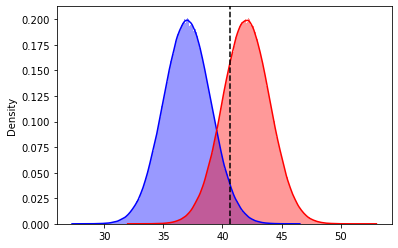

In [6]:
ax = sns.distplot(data1, bins = 500, kde = True, color = 'blue')
ax = sns.distplot(data2, bins = 500, kde = True, color = 'red')
ax.axvline(x = promedio, color = 'black', linestyle = '--', label = 'promedio muestral')
ax.legend()

Error tipo I: Rechazar H0 cuando en realidad era cierta.
Error top II: No rechazar H0 cuando en realidad es falsa.

Tipor de error en [Testing de Hipotesis](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)

Type I error: When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

Type II errors: When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.


In [8]:
# Error tipo 1 o alfa. Probabilidad de rechazar H0 cuando esta es verdadera
prob_prom_mu1 = norm.cdf(z_1)
(1 - prob_prom_mu1)*100 # en %

3.3624969419628448

In [11]:
# Error tipo 2 o beta. Probabilidad de no rechazar H0 cuando esta es falsa
prob_prom_mu2 = norm.cdf(z_2)
(prob_prom_mu2)*100 # en %

25.142889509530953